In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from mpl_toolkits.axes_grid.inset_locator import inset_axes

sys.path.append('../../../../code/python')
from mpl_settings_v3 import *

TypeError: unhashable type: 'numpy.ndarray'

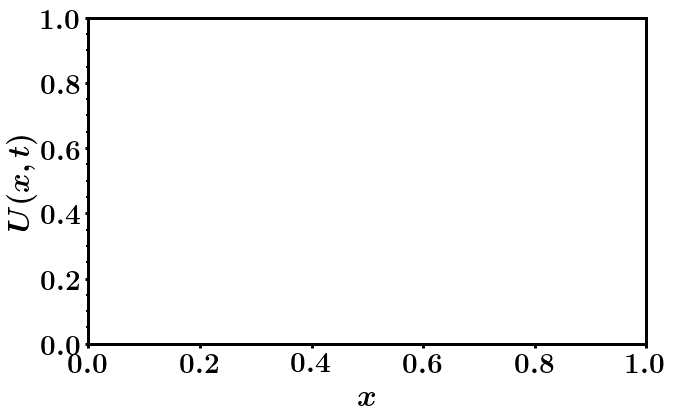

In [3]:
data = pd.read_csv('../Dump/adv_U_501.dat', sep=',', comment='#', names=['U'])
ti = data.index.values[0][0]
tf = data.index.values[-1][0]

ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)
ax = axes
ax.set_ylabel(r'$U(x,t)$')
ax.set_xlabel(r'$x$')
X = data.xs(0).index
X = X/X[-1]
for i in range(ti, tf+1, 10):
    ax.plot(X, data.xs(i).values, label=r'$t = {{{}}}$'.format(i))
    
ax.legend(loc='best')
ax.plot()

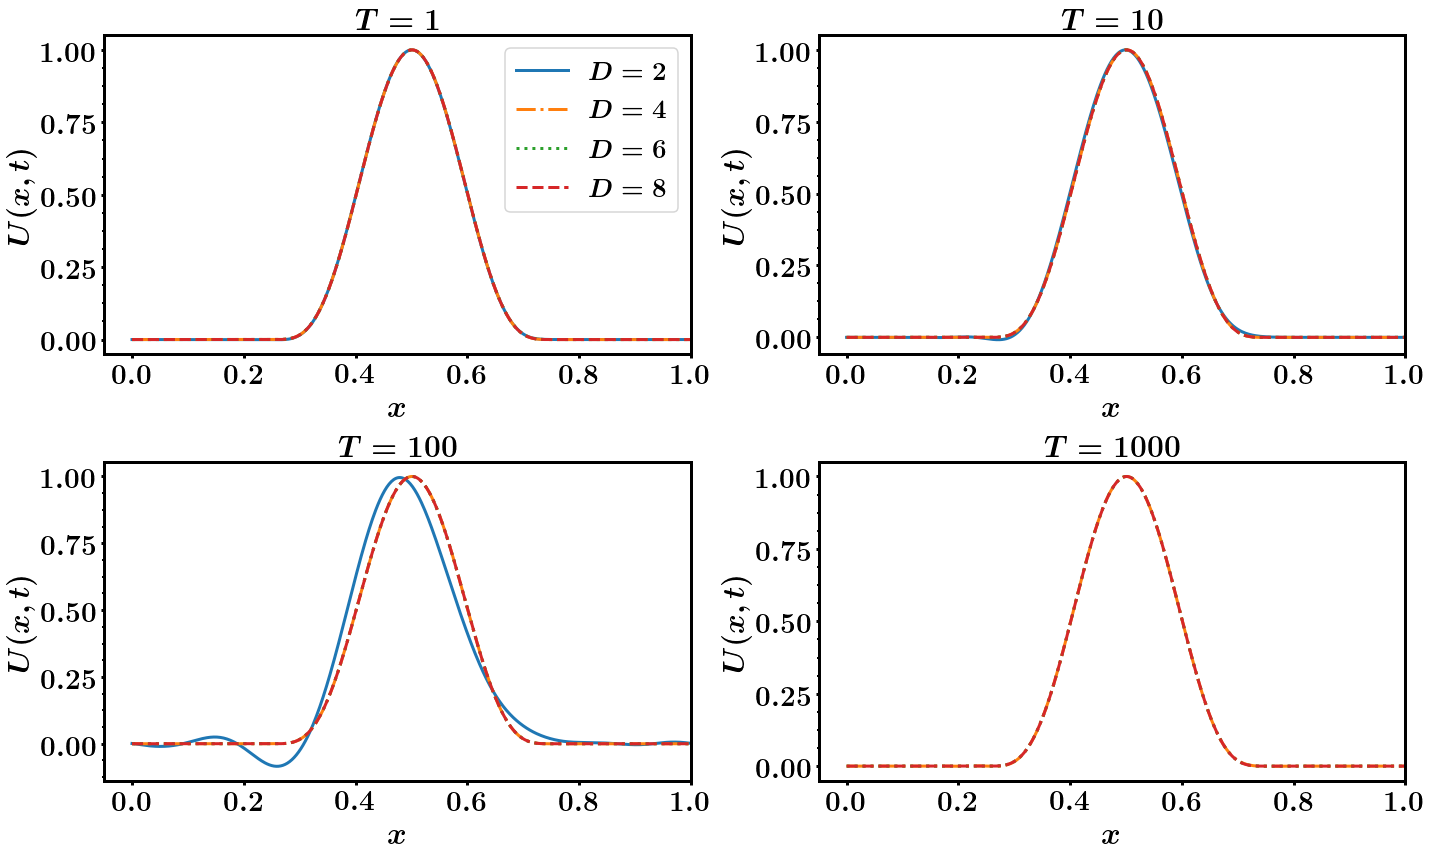

In [19]:
inset = False

grid = 501
T = 1000
dataSteps = 1000
intSteps = 1000


linestyles = ['-', '-.', ':', '--']
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)
axes = axes.flatten()

ti = 0
for i, tf in enumerate([1, 10, 100, 1000]):
    ax = axes[i]
    if inset:
        axins = inset_axes(ax,
                width="100%", 
                height="100%",
                bbox_to_anchor=(.12, .6, .3, .38),
                bbox_transform=ax.transAxes
            )

    for j, D in enumerate([2, 4, 6, 8]):
        if tf == 1000 and D == 2:
            continue
        if tf == 1:
            label = r'$D = {{{}}}$'.format(D)
        else:
            label = ''
        data_file_name = '../Dump/simple_D{D}_grid501_T{T}_dataSteps{dataSteps}_intSteps{intSteps}.dat'.format(
            D=D, grid=grid, T=T, dataSteps=dataSteps, intSteps=intSteps
        )
        data = pd.read_csv(data_file_name, 
                           sep=',', comment='#', names=['U'])


        ax.set_ylabel(r'$U(x,t)$')
        ax.set_xlabel(r'$x$')
        ax.set_xlim(-0.05, 1)
        X = data.xs(0).index
        X = X/X[-1]
        ax.plot(X, data.xs(tf).values, linestyle=linestyles[j], color=colors[j], label=label)
        ax.set_title(r'$T = {{{}}}$'.format(tf), fontsize=30)
        
        if inset:
            axins.set_xlim(0.2, 0.32)
            axins.set_ylim(-0.1, 0.2)
            axins.plot(X, data.xs(tf).values, linestyle=linestyles[j], color=colors[j])
         
    if label:
        ax.legend(loc='best')
    
plt.tight_layout()
plt.savefig('../../informe/figures/simple.png')
plt.show()